<a href="https://colab.research.google.com/github/edypj/NaturalLanguageProcessing/blob/main/BERTSentymentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [43]:
from google.colab import files
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from collections import Counter
from nltk import ngrams

# 2. Upload File

In [86]:
uploaded = files.upload()


KeyboardInterrupt: 

In [3]:
# Membaca file CSV yang diunggah
df = pd.read_csv('dataset_komentar_instagram_cyberbullying.csv')


# 3. Visualisasi

In [4]:
print(df.head())

   Id Sentiment                             Instagram Comment Text
0   1  negative   <USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1   2  negative  Geblek lo tata...cowo bgt dibela2in balikan......
2   3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...
3   4  negative  Intinya kalau kesel dengan ATT nya, gausah ke ...
4   5  negative  hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...


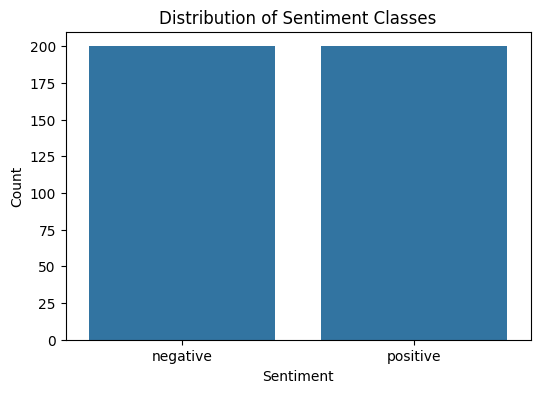

In [37]:
# Visualisasi Distribusi Kelas
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

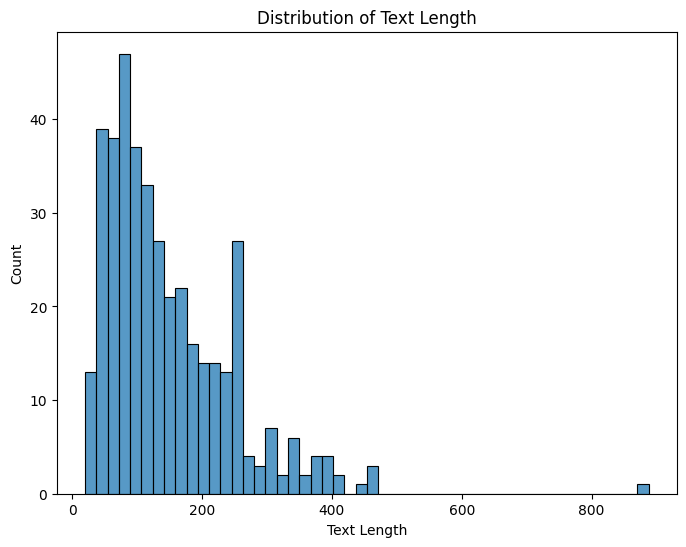

In [38]:
# Visualisasi Panjang Teks
plt.figure(figsize=(8, 6))
sns.histplot(df['Instagram Comment Text'].apply(len), bins=50)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


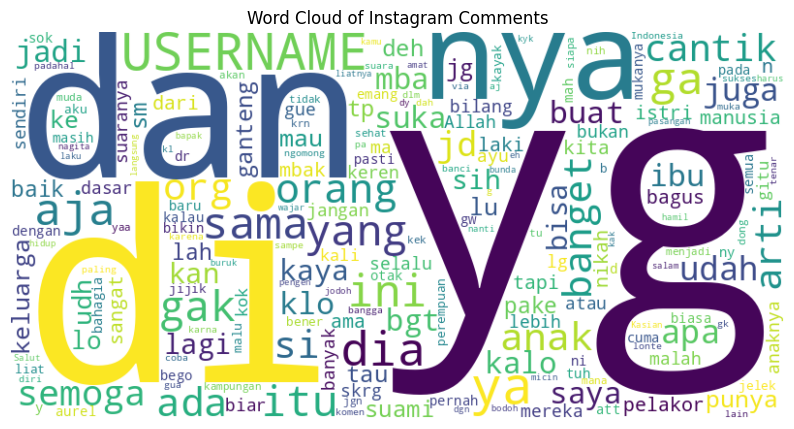

In [40]:
# Gabungkan semua teks menjadi satu string
all_text = ' '.join(df['Instagram Comment Text'])

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Instagram Comments')
plt.show()

Top 20 Most Common Words:
yg: 201
di: 118
dan: 96
<USERNAME>: 85
ga: 68
nya: 63
sama: 62
ya: 62
dia: 59
gak: 56
aja: 56
yang: 53
ada: 51
itu: 50
ini: 45
anak: 42
si: 41
??: 40
orang: 38
banget: 37


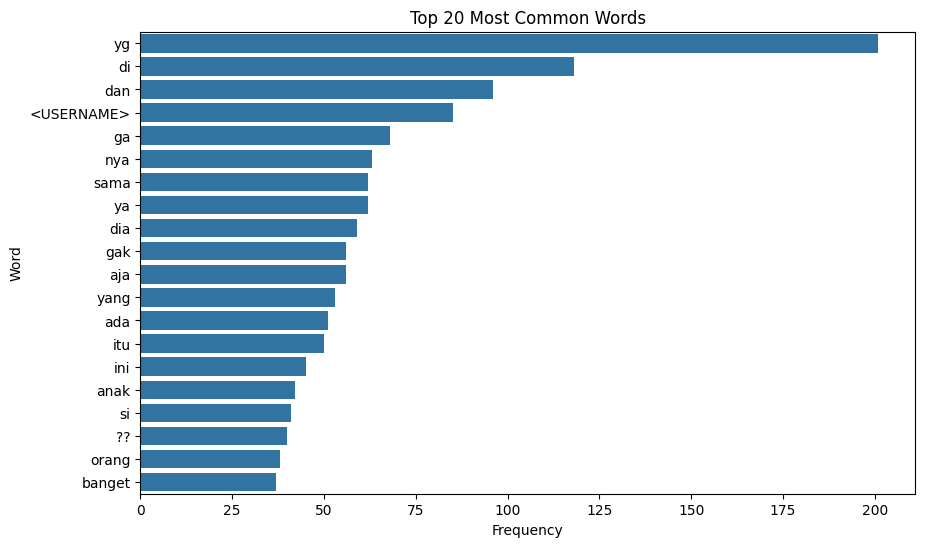

In [49]:
# Menghitung frekuensi kata-kata
word_freq = Counter(all_text.split())
common_words = word_freq.most_common(20)
print("Top 20 Most Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

# Mengambil 20 kata paling umum
common_words = word_freq.most_common(20)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()




Top 20 Most Common Bigrams:
           Bigram  Frequency
        (ada, yg)          8
       (gak, ada)          7
    (yg, penting)          6
      (ga, becus)          6
    (becus, jadi)          6
        (org, yg)          6
        (itu, yg)          5
     (jaman, now)          5
    (lebih, baik)          5
      (di, dunia)          5
        (yg, mau)          5
        (bgt, sm)          5
  (perempuan, yg)          5
       (biar, ga)          5
(jadi, perempuan)          5
      (anak, nya)          5
    (cantik, dan)          5
    (orang, yang)          4
        (dia, yg)          4
      (yg, punya)          4


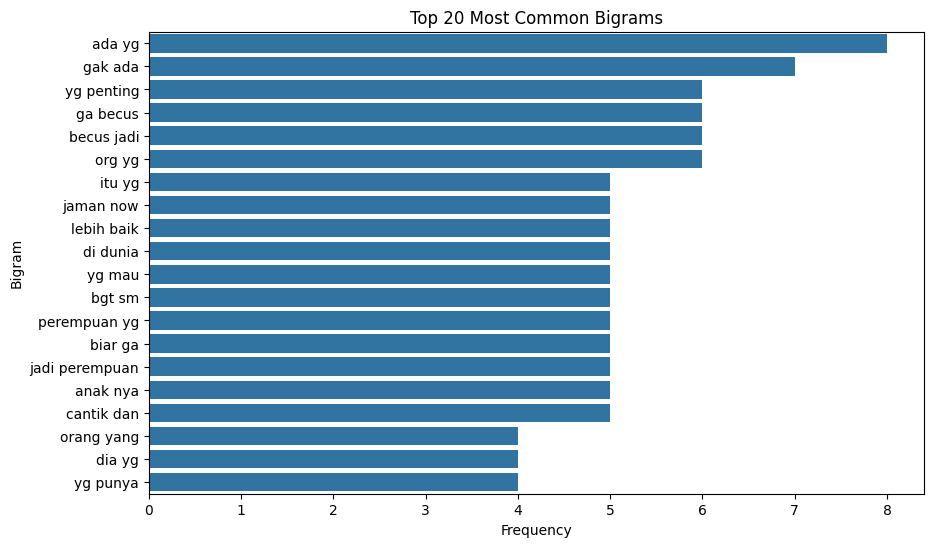

In [52]:
# Analisis N-gram
n = 2  # bigram
grams = ngrams(all_text.split(), n)
gram_freq = Counter(grams)
common_bigrams = gram_freq.most_common(20)
print("\nTop 20 Most Common Bigrams:")
bigram_df = pd.DataFrame(common_bigrams, columns=['Bigram', 'Frequency'])
print(bigram_df.to_string(index=False))

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=[gram[1] for gram in common_bigrams], y=[" ".join(gram[0]) for gram in common_bigrams])
plt.title('Top 20 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

In [59]:
# Menampilkan lima data dengan sentimen negatif
print("5 Data dengan Sentimen Negatif:")
print(df[df['Sentiment'] == 'negative'].head())

# Menampilkan lima data dengan sentimen positif
print("\n5 Data dengan Sentimen Positif:")
print(df[df['Sentiment'] == 'positive'].head())

5 Data dengan Sentimen Negatif:
   Id Sentiment                             Instagram Comment Text  \
0   1  negative   <USERNAME> TOLOL!! Gak ada hubungan nya kegug...   
1   2  negative  Geblek lo tata...cowo bgt dibela2in balikan......   
2   3  negative  Kmrn termewek2 skr lengket lg duhhh kok labil ...   
3   4  negative  Intinya kalau kesel dengan ATT nya, gausah ke ...   
4   5  negative  hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...   

                                     Cleaned Comment  Label  
0   username tolol gak ada hubungan nya keguguran...      0  
1  geblek lo tatacowo bgt dibela2in balikanhadeww...      0  
2  kmrn termewek2 skr lengket lg duhhh kok labil ...      0  
3  intinya kalau kesel dengan att nya gausah ke a...      0  
4  hadewwwww permpuan itu lgsakit jiwaknp harus d...      0  

5 Data dengan Sentimen Positif:
      Id Sentiment                             Instagram Comment Text  \
200  201  positive  yang sabar yaa.. insya Allah menjadi pembuka p...

# 4. Pelatihan Model Bert

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# Memisahkan fitur (teks) dan label (sentimen)
X = df['Cleaned Comment']
y = df['Label']

# Memisahkan dataset menjadi set pelatihan dan set pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cetak jumlah data dalam set pelatihan dan set pengujian
print("Jumlah data pelatihan:", len(X_train))
print("Jumlah data pengujian:", len(X_test))

Jumlah data pelatihan: 320
Jumlah data pengujian: 80


In [69]:
# Menampilkan beberapa baris pertama dari set pelatihan
print("Data Pelatihan:")
print(X_train.head())

# Menampilkan beberapa baris pertama dari set pengujian
print("\nData Pengujian:")
print(X_test.head())

# Menampilkan informasi dataset
print("\nInformasi Dataset:")
print(df.info())

Data Pelatihan:
3      intinya kalau kesel dengan att nya gausah ke a...
18      username yaa ampun ini upil naruto kata2nya m...
202    yg komen kenapa si mbak ini ga sedih malah ket...
250    go a head via cuekin ajalah udah biasa itu dal...
274    bagussss  dandannya natural ga banyak permak k...
Name: Cleaned Comment, dtype: object

Data Pengujian:
209    bagus dong mencari ilmu kapanpun dimanapun itu...
280    pembagian suaranya pas bngetpecah suaranya jg ...
33     cowok macam anjing cuihhh orang kaya tidak aka...
210       sukak cewe cantik dan kmauan blajarnya tinggi 
93     gue gak suka sm ni orang idupnya kebanyakan ribut
Name: Cleaned Comment, dtype: object

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null  

In [71]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os

# Inisialisasi tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Memuat data
# Pastikan data telah di-tokenisasi sebelumnya menggunakan tokenizer.encode
train_texts, test_texts, train_labels, test_labels = X_train, X_test, y_train, y_test

# Menggunakan tokenizer untuk mengkodekan teks ke dalam token-token
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)

# Membuat dataset PyTorch
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              torch.tensor(train_labels.values))
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']),
                             torch.tensor(test_encodings['attention_mask']),
                             torch.tensor(test_labels.values))

# Mendefinisikan loader data
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Inisialisasi model BERT untuk klasifikasi urutan
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Pilih perangkat (CPU atau GPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Mendefinisikan optimizer dan loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Pelatihan model
model.train()
for epoch in range(3):
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()

# Evaluasi model
model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Hitung metrik evaluasi
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

print(f'Accuracy on test set: {accuracy:.2%}')
print(f'Precision on test set: {precision:.2%}')
print(f'Recall on test set: {recall:.2%}')
print(f'F1 score on test set: {f1:.2%}')

# Simpan model
output_dir = './bert_sentiment_model/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
model.save_pretrained(output_dir)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy on test set: 86.25%
Precision on test set: 82.05%
Recall on test set: 88.89%
F1 score on test set: 85.33%


In [75]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(all_labels, all_predictions)


cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])


print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  37                   7
Actual Positive                   4                  32


In [78]:
# Inisialisasi tokenizer dan model yang telah dilatih
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tentukan perangkat (CPU atau GPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Memasukkan teks saat program dijalankan
new_text = input("Masukkan teks yang ingin Anda prediksi sentimennya: ")

# Praproses teks baru
encoded_input = tokenizer(new_text, truncation=True, padding=True, return_tensors='pt')
encoded_input.to(device)

# Gunakan model untuk membuat prediksi
with torch.no_grad():
    output = model(**encoded_input)

# Interpretasikan hasil prediksi
predicted_label = torch.argmax(output.logits).item()
if predicted_label == 0:
    sentiment = "negative"
else:
    sentiment = "positive"

print(f"Prediksi sentimen untuk teks '{new_text}': {sentiment}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Masukkan teks yang ingin Anda prediksi sentimennya: cantiknyaaaa
Prediksi sentimen untuk teks 'cantiknyaaaa': positive


In [83]:
# Inisialisasi tokenizer dan model yang telah dilatih
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tentukan perangkat (CPU atau GPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Memasukkan teks saat program dijalankan
new_text = input("Masukkan teks yang ingin Anda prediksi sentimennya: ")

# Praproses teks baru
encoded_input = tokenizer(new_text, truncation=True, padding=True, return_tensors='pt')
encoded_input.to(device)

# Gunakan model untuk membuat prediksi
with torch.no_grad():
    output = model(**encoded_input)

# Interpretasikan hasil prediksi
predicted_label = torch.argmax(output.logits).item()
if predicted_label == 0:
    sentiment = "negative"
else:
    sentiment = "positive"

print(f"Prediksi sentimen untuk teks '{new_text}': {sentiment}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Masukkan teks yang ingin Anda prediksi sentimennya: KAMU TOLOL
Prediksi sentimen untuk teks 'KAMU TOLOL': negative


# AUDIO To TEXT

In [107]:
uploaded = files.upload()

Saving Voice2.mp3 to Voice2.mp3


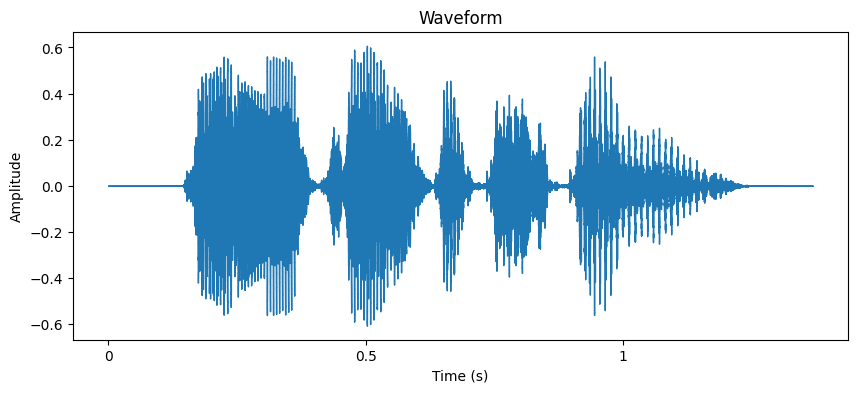

<ipython-input-110-a1e5b71bb3fa>:19: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


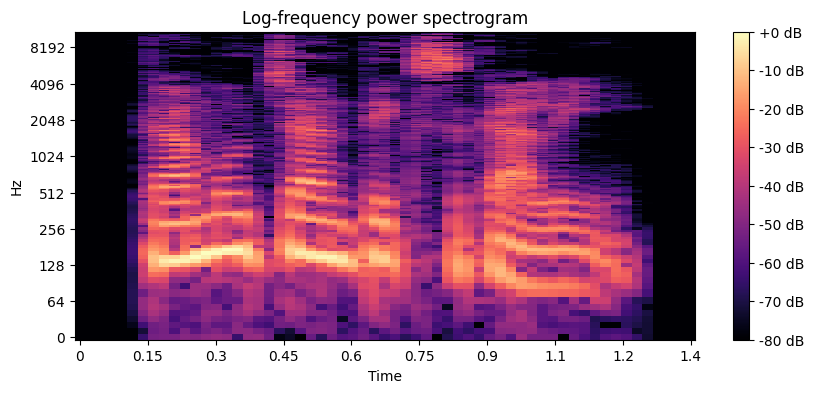

In [110]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Memuat file audio
audio_path = 'Voice2.mp3'
y, sr = librosa.load(audio_path)

# Menampilkan gelombang audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Menampilkan spektrogram audio
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')
plt.show()

In [100]:
!pip install SpeechRecognition

In [101]:
!pip install pydub

In [111]:
from pydub import AudioSegment

# Memuat file audio dalam format MP3
audio_path_mp3 = 'Voice2.mp3'
audio = AudioSegment.from_mp3(audio_path_mp3)

# Menyimpan file audio dalam format WAV
audio_path_wav = 'Voice2.wav'
audio.export(audio_path_wav, format='wav')

print("Konversi dari MP3 ke WAV selesai.")


Konversi dari MP3 ke WAV selesai.


In [114]:
import speech_recognition as sr

# Membuat objek recognizer
recognizer = sr.Recognizer()

# Memuat file audio
audio_path_wav = 'Voice2.wav'
with sr.AudioFile(audio_path_wav) as source:
    audio_data = recognizer.record(source)  # Merekam audio dari file

# Mengonversi audio menjadi teks dalam Bahasa Indonesia
converted_text = recognizer.recognize_google(audio_data, language='id-ID')

print("Hasil konversi teks:")
print(converted_text)

Hasil konversi teks:
Kamu cantik sekali


In [119]:
# Tokenisasi teks yang telah dikonversi
tokenized_text = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(converted_text))

# Ubah tokenized_text menjadi tensor
input_ids = torch.tensor([tokenized_text]).to(device)

# Lakukan prediksi sentimen
model.eval()
with torch.no_grad():
    outputs = model(input_ids)
    _, predicted_label = torch.max(outputs.logits, dim=1)

# Tampilkan hasil prediksi
sentiment_label = "Positive" if predicted_label.item() == 1 else "Negative"
print("Hasil prediksi sentimen:", sentiment_label)

Hasil prediksi sentimen: Positive
